
Step 1: Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataa/SMS_Dataset (7).csv", encoding="latin-1")

print(df.head())

       Sender                                            Message  \
0  Sender_313  EMI overdue! Pay â¹65918 immediately to avoid...   
1  Sender_521         Important: Property tax deadline extended.   
2  Sender_735  EMI overdue! Pay â¹44634 immediately to avoid...   
3  Sender_392           Doctor's appointment confirmed for 3 PM.   
4  Sender_110               Your login OTP for AppXYZ is 456789.   

             Timestamp   Amount  Amount_Category  
0  2025-01-26 05:37:52  65918.0  Very High Value  
1  2025-01-11 18:37:52      NaN              NaN  
2  2025-01-07 16:37:52  44634.0       High Value  
3  2025-01-30 11:37:52      NaN              NaN  
4  2025-01-17 08:37:52      NaN              NaN  


Step 2:Add New Columns

In [2]:
df["Category"] = None
df["Subcategory"] = None
print(df.head())

       Sender                                            Message  \
0  Sender_313  EMI overdue! Pay â¹65918 immediately to avoid...   
1  Sender_521         Important: Property tax deadline extended.   
2  Sender_735  EMI overdue! Pay â¹44634 immediately to avoid...   
3  Sender_392           Doctor's appointment confirmed for 3 PM.   
4  Sender_110               Your login OTP for AppXYZ is 456789.   

             Timestamp   Amount  Amount_Category Category Subcategory  
0  2025-01-26 05:37:52  65918.0  Very High Value     None        None  
1  2025-01-11 18:37:52      NaN              NaN     None        None  
2  2025-01-07 16:37:52  44634.0       High Value     None        None  
3  2025-01-30 11:37:52      NaN              NaN     None        None  
4  2025-01-17 08:37:52      NaN              NaN     None        None  


Step 3: Define Categories and Subcategories

In [3]:
category_mapping = {
    "Spam": {
        "Fraud": ["fraud", "scam", "phishing", "hack"],
        "Lottery": ["lottery", "prize", "winner", "jackpot"],
        "Advertisements": ["ad", "offer", "discount", "sale", "promo"]
    },
    "OTP": {
        "OTP": ["otp", "one time password"]
    },

    "Personal": {
        "Friends": ["friend", "buddy", "pal", "hangout"],
        "Family": ["mom", "dad", "family", "brother", "sister"],
        "Colleagues": ["colleague", "team", "meeting", "work"]
    },
    "Financial Transactions": {
        "Credit": ["credited", "received", "deposited"],
        "Debit": ["debited", "withdrawn", "paid"],
        "UPI": ["upi", "upi transaction", "upi payment"],
        "Credit Card": ["credit card", "card payment"],
        "Loan": ["loan", "emi", "repayment"],
        "EMI": ["emi", "installment"]
    },
    "Promotional & Marketing": {
        "Discounts": ["discount", "off", "coupon"],
        "Sales": ["sale", "clearance", "flash sale"],
        "Offers": ["offer", "deal", "bargain"]
    },
    "Government & Utility": {
        "Bills": ["bill", "electricity bill", "water bill"],
        "Notifications": ["notification", "alert", "reminder"]
    },
    "Travel & Ticketing": {
        "Flights": ["flight", "airline", "boarding pass"],
        "Trains": ["train", "railway", "irctc"],
        "Hotels": ["hotel", "booking", "reservation"]
    },
    "Healthcare & Medical": {
        "Appointments": ["appointment", "doctor", "clinic"],
        "Reports": ["report", "test result", "lab"],
        "Prescriptions": ["prescription", "medicine", "pharmacy"]
    },
    "Work & Business": {
        "Job Updates": ["job", "interview", "recruitment"],
        "Business Messages": ["business", "client", "meeting"]
    },
    "Miscellaneous": {
        "Uncategorized Messages": []  # Default for unmatched messages
    }
}

Step 4: Categorize Messages



In [6]:
import re
from sklearn.preprocessing import LabelEncoder

def categorize_message(message):
    message = message.lower()  # Convert to lowercase for case-insensitive matching
    print(f"Message: {message}")  # Debug: print the message

    # OTP category check (all OTP-related messages will be grouped here)
    if "otp" in message or "one time password" in message:
        print("Category: OTP, Subcategory: OTP")  # Debug: OTP identified
        return "OTP", "OTP"

    # Financial category check
    if "debited" in message or "withdrawn" in message or "paid" in message or "payment made" in message:
        print("Category: Financial Transactions, Subcategory: Debit")  # Debug: Debit identified
        return "Financial Transactions", "Debit"

    if "credited" in message or "received" in message or "deposited" in message or "added" in message:
        print("Category: Financial Transactions, Subcategory: Credit")  # Debug: Credit identified
        return "Financial Transactions", "Credit"

    if "upi" in message or "upi transaction" in message or "upi payment" in message:
        print("Category: Financial Transactions, Subcategory: UPI")  # Debug: UPI identified
        return "Financial Transactions", "UPI"

    if "credit card" in message or "card payment" in message:
        print("Category: Financial Transactions, Subcategory: Credit Card")  # Debug: Credit Card identified
        return "Financial Transactions", "Credit Card"

    if "loan" in message or "emi" in message or "repayment" in message:
        print("Category: Financial Transactions, Subcategory: Loan")  # Debug: Loan identified
        return "Financial Transactions", "Loan"

    # General checks for other categories
    for category, subcategories in category_mapping.items():
        for subcategory, keywords in subcategories.items():
            for keyword in keywords:
                if re.search(rf"\b{keyword}\b", message):  # Match whole words
                    print(f"Category: {category}, Subcategory: {subcategory}")  # Debug: Keyword match
                    return category, subcategory

    print("Category: Miscellaneous, Subcategory: Uncategorized Messages")  # Debug: Miscellaneous identified
    return "Miscellaneous", "Uncategorized Messages"

# Apply categorization to the DataFrame
df[["Category", "Subcategory"]] = df["Message"].apply(categorize_message).apply(pd.Series)

# Encode labels
label_encoder_category = LabelEncoder()
df["Category_Encoded"] = label_encoder_category.fit_transform(df["Category"])

label_encoder_subcategory = LabelEncoder()
df["Subcategory_Encoded"] = label_encoder_subcategory.fit_transform(df["Subcategory"])

# Check output
print([["Message", "Category", "Subcategory"]])


Streaming output truncated to the last 5000 lines.
Category: Work & Business, Subcategory: Job Updates
Message: â¹64383 withdrawn from atm.
Category: Financial Transactions, Subcategory: Debit
Message: â¹43674 spent on your credit card at amazon.
Category: Financial Transactions, Subcategory: Credit Card
Message: your electricity bill of â¹1200 is due on 10th.
Category: Government & Utility, Subcategory: Bills
Message: you've won $1,000,000! claim now by clicking here.
Category: Miscellaneous, Subcategory: Uncategorized Messages
Message: prescription refill reminder: check your stock.
Category: Financial Transactions, Subcategory: Loan
Message: your login otp for appxyz is 456789.
Category: OTP, Subcategory: OTP
Message: secure login otp: 654321.
Category: OTP, Subcategory: OTP
Message: your bank otp is 123456. do not share with anyone.
Category: OTP, Subcategory: OTP
Message: â¹20127 spent on your credit card at amazon.
Category: Financial Transactions, Subcategory: Credit Card
Me

Step 5: Verify the Categorization

In [7]:
print(df["Category"].value_counts())
print(df["Subcategory"].value_counts())

Category
Financial Transactions     1828
Miscellaneous              1571
Spam                       1523
Travel & Ticketing         1012
Personal                    817
Healthcare & Medical        789
OTP                         746
Government & Utility        676
Work & Business             648
Promotional & Marketing     390
Name: count, dtype: int64
Subcategory
Uncategorized Messages    1571
Advertisements            1165
Loan                      1086
OTP                        746
Bills                      573
Job Updates                527
Reports                    416
Credit                     400
Family                     381
Flights                    378
Trains                     378
Lottery                    358
Colleagues                 296
Discounts                  262
Hotels                     256
Appointments               252
Friends                    140
Offers                     128
Prescriptions              121
Business Messages          121
UPI          

In [8]:
df.to_csv("categorized_sms_dataset.csv", index=False)

 Preprocess the Data for Machine

In [9]:
import nltk

# Download stopwords and punkt tokenizer
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text)
    cleaned_text = " ".join([word for word in tokens if word not in stop_words])
    return cleaned_text

# Apply text cleaning
df["Cleaned_Message"] = df["Message"].apply(clean_text)



Prepare Data for BERT

In [11]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text
encoded_data = tokenizer.batch_encode_plus(
    df["Cleaned_Message"].tolist(),
    add_special_tokens=True,
    max_length=64,
    padding="max_length",
    truncation=True,
    return_attention_mask=True,
    return_tensors="pt"
)

# Extract input IDs and attention masks
input_ids = encoded_data["input_ids"]
attention_masks = encoded_data["attention_mask"]
labels = torch.tensor(df["Category_Encoded"].values)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Split the Data

In [12]:
from sklearn.model_selection import train_test_split
# Split the data
train_inputs, test_inputs, train_masks, test_masks, train_labels, test_labels = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2, random_state=42
)

 Fine-Tune BERT

In [13]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Create a TensorDataset from the training data
train_data = TensorDataset(train_inputs, train_masks, train_labels)

# Define the batch size
batch_size = 32  # Adjust as needed

# Create a DataLoader for the training data
train_dataloader = DataLoader(
    train_data,
    sampler=RandomSampler(train_data),  # Use RandomSampler for shuffling
    batch_size=batch_size
)
test_data = TensorDataset(test_inputs, test_masks, test_labels)

# Create a DataLoader for the testing data
test_dataloader = DataLoader(
    test_data,
    sampler=SequentialSampler(test_data),  # Use SequentialSampler for evaluation
    batch_size=batch_size)

Train

In [14]:
from sklearn.utils.class_weight import compute_class_weight
import torch.nn as nn
from transformers import BertForSequenceClassification, AdamW

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",  # Use the pre-trained BERT model
    num_labels=len(label_encoder_category.classes_)  # Set the number of output labels
)
model.to(device)  # Move the model to the device (GPU if available)

# Initialize the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)  # You can adjust the learning rate

# Compute class weights
class_weights = compute_class_weight('balanced', classes=torch.unique(labels).cpu().numpy(), y=labels.cpu().numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define weighted loss function
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

epochs = 5
# Modify training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        optimizer.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_input_mask)

        loss = loss_fn(outputs.logits, b_labels)  # Use weighted loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}, Loss: {avg_loss}")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 0.6109722263664007
Epoch 2, Loss: 0.02774439799040556
Epoch 3, Loss: 0.011720549400895834
Epoch 4, Loss: 0.006893178360536695
Epoch 5, Loss: 0.004601267443038523


 Evaluate the Model

In [15]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report
# Create a TensorDataset from the testing data

model.eval()
predictions, true_labels = [], []

for batch in test_dataloader:
    # Move batch to GPU
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    # Disable gradient calculation
    with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask)

    # Get predictions
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()
    predictions.extend(preds)
    true_labels.extend(b_labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:\n", classification_report(true_labels, predictions, target_names=df["Category"].unique()))

Accuracy: 1.0
Classification Report:
                          precision    recall  f1-score   support

 Financial Transactions       1.00      1.00      1.00       385
          Miscellaneous       1.00      1.00      1.00       135
   Healthcare & Medical       1.00      1.00      1.00       138
                    OTP       1.00      1.00      1.00       314
     Travel & Ticketing       1.00      1.00      1.00       145
        Work & Business       1.00      1.00      1.00       156
                   Spam       1.00      1.00      1.00        80
               Personal       1.00      1.00      1.00       303
   Government & Utility       1.00      1.00      1.00       219
Promotional & Marketing       1.00      1.00      1.00       125

               accuracy                           1.00      2000
              macro avg       1.00      1.00      1.00      2000
           weighted avg       1.00      1.00      1.00      2000



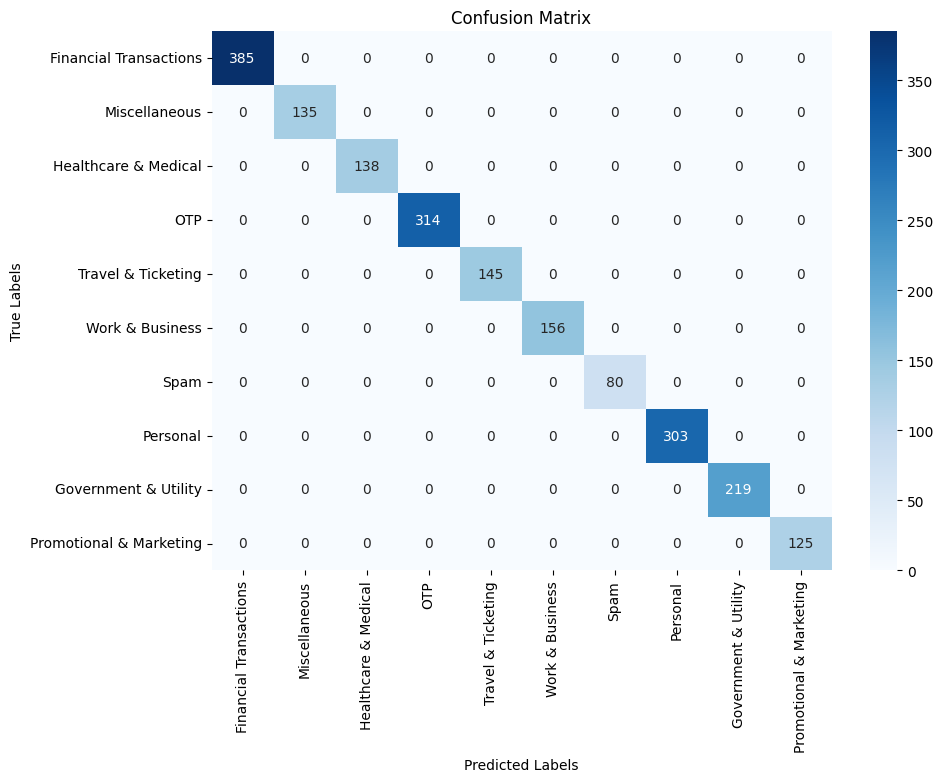

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df["Category"].unique(), yticklabels=df["Category"].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Save the Model

In [17]:
# Save the model
model.save_pretrained("fine_tuned_bert_sms_model")

# Save the tokenizer
tokenizer.save_pretrained("fine_tuned_bert_sms_tokenizer")

('fine_tuned_bert_sms_tokenizer/tokenizer_config.json',
 'fine_tuned_bert_sms_tokenizer/special_tokens_map.json',
 'fine_tuned_bert_sms_tokenizer/vocab.txt',
 'fine_tuned_bert_sms_tokenizer/added_tokens.json')

Load the Fine-Tuned Model and Tokenizer

In [18]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load the fine-tuned model and tokenizer
model = BertForSequenceClassification.from_pretrained("fine_tuned_bert_sms_model")
tokenizer = BertTokenizer.from_pretrained("fine_tuned_bert_sms_tokenizer")

# Move model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

Define the Prediction Function


In [19]:
def predict_sms_category(message):
    # Clean the message
    cleaned_message = clean_text(message)

    # Tokenize the message
    inputs = tokenizer(
        cleaned_message,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=64
    )

    # Move inputs to GPU (if available)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Predict the category
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_category_encoded = torch.argmax(logits, dim=1).cpu().item()

    # Decode the predicted category
    predicted_category = label_encoder_category.inverse_transform([predicted_category_encoded])[0]

    # Predict the subcategory (if needed)
    if predicted_category == "Financial Transactions":
        predicted_subcategory_encoded = torch.argmax(logits, dim=1).cpu().item()
        predicted_subcategory = label_encoder_subcategory.inverse_transform([predicted_subcategory_encoded])[0]
    else:
        predicted_subcategory = None

    return predicted_category, predicted_subcategory

Take User Input and Predict

In [20]:
# Take user input
user_message = input("Enter the SMS message: ")

# Predict the category and subcategory
predicted_category, predicted_subcategory = predict_sms_category(user_message)

# Display the result

print(f"Predicted Category: {predicted_category}")
if predicted_subcategory:
    print(f"Predicted Subcategory: {predicted_subcategory}")

Enter the SMS message: your otp is 3423
Predicted Category: OTP


Save the Updated Dataset

In [21]:
# Append the user input and prediction to the dataset
new_entry = {
    "Message": [user_message],
    "Category": [predicted_category],
    "Subcategory": [predicted_subcategory if predicted_subcategory else "N/A"]
}

new_df = pd.DataFrame(new_entry)
df = pd.concat([df, new_df], ignore_index=True)

# Save the updated dataset
df.to_csv("updated_sms_dataset.csv", index=False)

Create Databases

In [22]:
import pandas as pd

# Sender Data Table
sender_data = df[["Sender","Message", "Category", "Subcategory","Timestamp"]].copy()
sender_data.to_excel("sender_data.xlsx", index=False)  # Save as Excel file

# OTP Database
otp_data = df[df["Category"] == "OTP"][["Message", "Subcategory","Timestamp"]]
otp_data.to_excel("otp_database.xlsx", index=False)  # Save as Excel file

# Financial Database
financial_data = df[df["Category"] == "Financial Transactions"][["Message", "Subcategory","Amount", "Amount_Category", "Timestamp"]]
financial_data.to_excel("financial_database.xlsx", index=False)  # Save as Excel file

In [23]:
with pd.ExcelWriter("categorized_data.xlsx", engine="openpyxl") as writer:
    pd.read_excel("sender_data.xlsx").to_excel(writer, sheet_name="Sender Data", index=False) # Changed to read_excel and correct filename
    pd.read_excel("otp_database.xlsx").to_excel(writer, sheet_name="OTP Data", index=False) # Changed to read_excel and correct filename
    pd.read_excel("financial_database.xlsx").to_excel(writer, sheet_name="Financial Data", index=False) # Changed to read_excel and correct filename

print("Multiple Excel files saved into one Excel file!") # Updated message for clarity

Multiple Excel files saved into one Excel file!
